In [1]:
%pip install tensorflow tensorflow-io matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 33.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
data = "/content/data"

In [6]:
CAPUCHIN_FILE = os.path.join(data, 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join(data, 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [7]:
CAPUCHIN_FILE

'/content/data/Parsed_Capuchinbird_Clips/XC3776-3.wav'

In [8]:
NOT_CAPUCHIN_FILE

'/content/data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [9]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [10]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

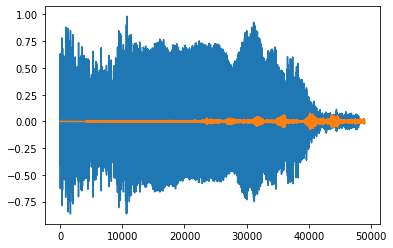

In [11]:
plt.plot(wave)
plt.plot(nwave)
plt.show()


In [12]:
POS = os.path.join(data, 'Parsed_Capuchinbird_Clips')
NEG = os.path.join(data, 'Parsed_Not_Capuchinbird_Clips')

In [13]:
POS

'/content/data/Parsed_Capuchinbird_Clips'

In [14]:
NEG

'/content/data/Parsed_Not_Capuchinbird_Clips'

In [15]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [16]:
pos.as_numpy_iterator().next()

b'/content/data/Parsed_Capuchinbird_Clips/XC495697-0.wav'

In [17]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [18]:
positives.as_numpy_iterator().next()

(b'/content/data/Parsed_Capuchinbird_Clips/XC520626-3.wav', 1.0)

In [19]:
negatives.as_numpy_iterator().next()

(b'/content/data/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-32.wav',
 0.0)

In [20]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/content/data/Parsed_Not_Capuchinbird_Clips/crickets-chirping-crickets-sound-12.wav',
 0.0)

In [21]:
lengths = []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [22]:
os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips'))

['XC227469-4.wav',
 'XC216012-16.wav',
 'XC46241-0.wav',
 'XC9892-0.wav',
 'XC40355-0.wav',
 'XC307385-0.wav',
 'XC513083-0.wav',
 'XC388470-3.wav',
 'XC3776-5.wav',
 'XC387509-4.wav',
 'XC227471-4.wav',
 'XC22397-0.wav',
 'XC114132-2.wav',
 'XC65196-3.wav',
 'XC22397-1.wav',
 'XC388470-6.wav',
 'XC22397-2.wav',
 'XC65196-2.wav',
 'XC387509-1.wav',
 'XC227469-3.wav',
 'XC456236-1.wav',
 'XC3776-1.wav',
 'XC46077-2.wav',
 'XC27882-3.wav',
 'XC27882-0.wav',
 'XC227468-1.wav',
 'XC526106-1.wav',
 'XC114132-6.wav',
 'XC520626-1.wav',
 'XC479556-0.wav',
 'XC387509-2.wav',
 'XC65196-0.wav',
 'XC401294-0.wav',
 'XC27882-1.wav',
 'XC168899-0.wav',
 'XC388470-1.wav',
 'XC495697-0.wav',
 'XC227471-5.wav',
 'XC227468-4.wav',
 'XC395129-5.wav',
 'XC216012-15.wav',
 'XC22397-6.wav',
 'XC27881-1.wav',
 'XC79965-2.wav',
 'XC216010-3.wav',
 'XC79965-1.wav',
 'XC216012-3.wav',
 'XC388470-0.wav',
 'XC216012-0.wav',
 'XC216012-4.wav',
 'XC79965-0.wav',
 'XC216012-7.wav',
 'XC307385-4.wav',
 'XC46241-1.wa

In [23]:
lengths

[56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 32000,
 48000,
 56000,
 56000,
 64000,
 64000,
 56000,
 40000,
 64000,
 40000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 64000,
 64000,
 56000,
 56000,
 48000,
 64000,
 56000,
 56000,
 64000,
 56000,
 64000,
 48000,
 48000,
 48000,
 56000,
 48000,
 48000,
 56000,
 56000,
 72000,
 56000,
 56000,
 40000,
 40000,
 64000,
 56000,
 48000,
 56000,
 64000,
 56000,
 40000,
 48000,
 56000,
 56000,
 64000,
 56000,
 55999,
 64000,
 64000,
 40000,
 64000,
 48000,
 48000,
 56000,
 48000,
 56000,
 40000,
 64000,
 64000,
 48000,
 56000,
 64000,
 40000,
 48000,
 64000,
 64000,
 56000,
 40000,
 56000,
 56000,
 48000,
 56000,
 48000,
 56000,
 64000,
 48000,
 72000,
 56000,
 56000,
 48000,
 48000,
 56000,
 72000,
 56000,
 56000,
 48000,
 48000,
 48000,
 40000,
 80000,
 64000,
 48000,
 56000,
 48000,
 56000,
 64000,
 40000,
 48000,
 64000,
 48000,
 48000,
 64000,
 48000,
 64000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,


In [24]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [25]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [26]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [27]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [28]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
wav = tf.concat([zero_padding, wav],0)
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

In [29]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram = tf.abs(spectrogram)
spectrogram = tf.expand_dims(spectrogram, axis=2)
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[7.25913644e-02],
        [7.10330531e-02],
        [6.97736368e-02],
        ...,
        [4.76465182e-04],
        [2.46995420e-04],
        [7.33137131e-06]],

       [[3.56648862e-03],
        [9.92665999e-04],
        [5.69074415e-03],
        ...,
        [3.89362685e-04],
        [1.96771347e-04],
        [3.31550837e-05]],

       [[3.76079977e-03],
        [2.74862791e-03],
        [3.54933785e-03],
        ...,
        [3.23321641e-04],
        [2.26509219e-04],
        [4.48077917e-05]],

       ...,

       [[5.86301833e-03],
        [8.90618097e-03],
        [1.50155481e-02],
        ...,
        [7.96053617e-04],
        [3.32766504e-04],
        [1.28917396e-04]],

       [[3.70551646e-03],
        [6.76805852e-03],
        [1.34907337e-02],
        ...,
        [7.47070473e-04],
        [4.19661519e-04],
        [2.72586942e-04]],

       [[6.53017312e-04],
        [3.54314479e-03],
        [1.09438235e-02]

In [30]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [31]:
spectrogram, label = preprocess(filepath, label)


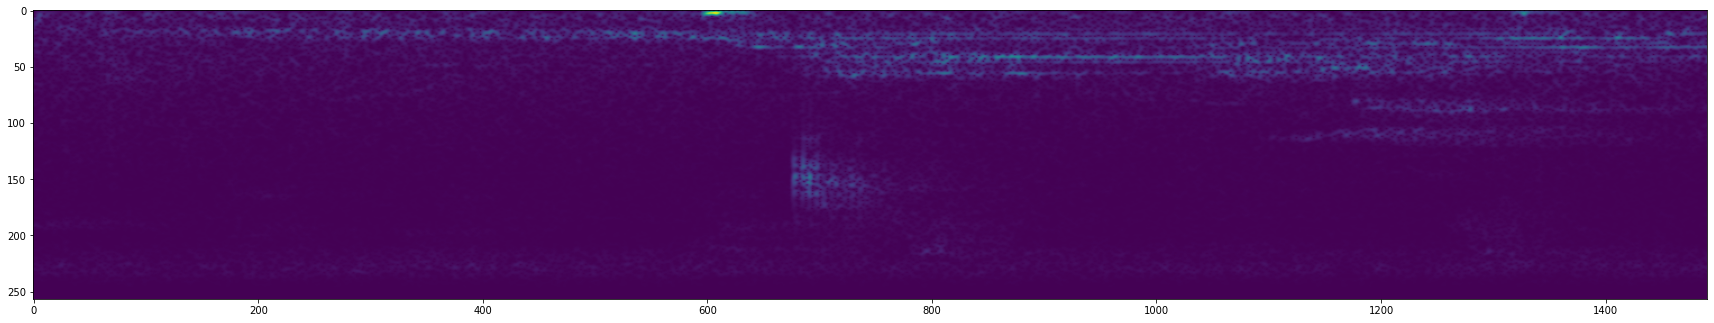

In [32]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [33]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [34]:
train = data.take(36)
test = data.skip(36).take(15)

In [35]:
samples, labels = train.as_numpy_iterator().next()

In [36]:
samples.shape

(16, 1491, 257, 1)

In [37]:
labels

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [39]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 1)                 6019377   
                                                                 
Total params: 6,021,857
Trainable params: 6,021,857
Non-trainable params: 0
_________________________________________________________________


In [42]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 16s 164ms/step - loss: 1.9760 - recall: 0.8571 - precision: 0.7952 - val_loss: 0.1593 - val_recall: 0.9516 - val_precision: 0.9833
Epoch 2/4
36/36 [==============================] - 5s 139ms/step - loss: 0.1001 - recall: 0.9551 - precision: 0.9675 - val_loss: 0.0467 - val_recall: 0.9821 - val_precision: 0.9483
Epoch 3/4
36/36 [==============================] - 5s 144ms/step - loss: 0.0561 - recall: 0.9679 - precision: 0.9869 - val_loss: 0.0142 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 5s 143ms/step - loss: 0.0139 - recall: 0.9934 - precision: 0.9934 - val_loss: 0.0145 - val_recall: 1.0000 - val_precision: 0.9841


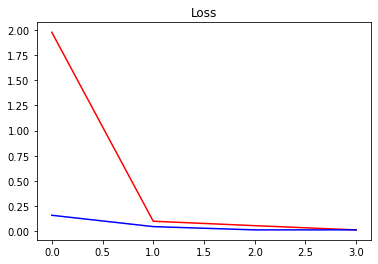

In [43]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

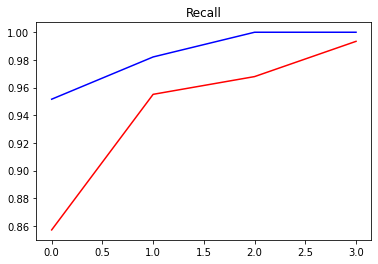

In [44]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

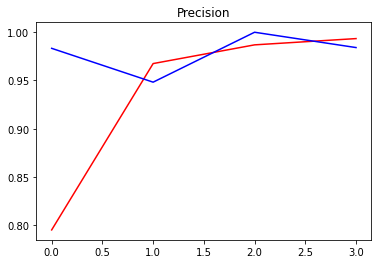

In [45]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [46]:
hist.history ['loss']

[1.9759697914123535,
 0.10008147358894348,
 0.056090958416461945,
 0.01387093961238861]

In [47]:
X_test, y_test = test.as_numpy_iterator().next()

In [48]:
X_test.shape

(16, 1491, 257, 1)

In [49]:
y_test.shape

(16,)

In [50]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 101ms/step


In [51]:
yhat

array([[2.6519338e-21],
       [6.7786395e-15],
       [7.5484483e-25],
       [6.7487585e-05],
       [9.9999535e-01],
       [9.9999833e-01],
       [3.8534067e-29],
       [3.7640265e-22],
       [1.4814181e-11],
       [2.4603038e-13],
       [1.0000000e+00],
       [1.5968933e-05],
       [2.1612260e-15],
       [1.0000000e+00],
       [2.4377305e-15],
       [1.0000000e+00]], dtype=float32)

In [52]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [53]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [54]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [55]:
yhat

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]

In [56]:
y_test.astype(int)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [57]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [58]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

In [59]:
wav = load_mp3_16k_mono(mp3)

In [60]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [61]:
samples, index = audio_slices.as_numpy_iterator().next()

In [62]:
samples.shape

(1, 48000)

In [63]:
len(audio_slices)

60

In [64]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [65]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [66]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

1/1 [==============================] - 2s 2s/step


In [67]:
yhat

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [68]:
from itertools import groupby

In [69]:
yhat = [key for key, group in groupby(yhat)]

In [70]:
yhat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [71]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [72]:
calls = tf.math.reduce_sum(yhat).numpy()

In [73]:
calls

5

In [74]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

1/1 [==============================] - 1s 1s/step


In [75]:
results

{'recording_11.mp3': array([[0.25542483],
        [0.24424627],
        [0.06321044],
        [0.0584411 ],
        [1.        ],
        [1.        ],
        [0.2012462 ],
        [0.40911466],
        [0.12804112],
        [0.61769825],
        [0.5191735 ],
        [0.50493354],
        [0.34737605],
        [0.7495865 ],
        [0.8093127 ],
        [0.14903146],
        [0.81105745],
        [1.        ],
        [0.09315526],
        [0.8511799 ],
        [0.40053117],
        [0.67393965],
        [0.87647885],
        [0.29004312],
        [0.9692544 ],
        [0.81497437],
        [0.18140069],
        [0.10541741],
        [0.21684888],
        [0.21879174],
        [0.18419015],
        [0.15636443],
        [0.26618806],
        [0.13318491],
        [0.42519543],
        [0.9247079 ],
        [0.9994273 ],
        [0.99964786],
        [0.86339086],
        [0.9955915 ],
        [0.75802565],
        [0.32151923],
        [0.19357383],
        [0.21917872],
        [0.9

In [76]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_11.mp3': [0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_90.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_15.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_49.mp3': [0,
  0,
  0,
  

In [77]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_11.mp3': 5,
 'recording_90.mp3': 0,
 'recording_15.mp3': 2,
 'recording_49.mp3': 0,
 'recording_01.mp3': 0,
 'recording_20.mp3': 0,
 'recording_50.mp3': 0,
 'recording_86.mp3': 18,
 'recording_23.mp3': 7,
 'recording_51.mp3': 3,
 'recording_38.mp3': 1,
 'recording_14.mp3': 0,
 'recording_59.mp3': 7,
 'recording_13.mp3': 0,
 'recording_83.mp3': 0,
 'recording_77.mp3': 3,
 'recording_85.mp3': 0,
 'recording_45.mp3': 3,
 'recording_72.mp3': 5,
 'recording_37.mp3': 3,
 'recording_09.mp3': 0,
 'recording_31.mp3': 1,
 'recording_08.mp3': 20,
 'recording_76.mp3': 0,
 'recording_99.mp3': 5,
 'recording_60.mp3': 5,
 'recording_28.mp3': 11,
 'recording_39.mp3': 14,
 'recording_57.mp3': 4,
 'recording_10.mp3': 5,
 'recording_64.mp3': 3,
 'recording_71.mp3': 7,
 'recording_32.mp3': 2,
 'recording_94.mp3': 3,
 'recording_19.mp3': 1,
 'recording_67.mp3': 0,
 'recording_69.mp3': 1,
 'recording_89.mp3': 3,
 'recording_22.mp3': 2,
 'recording_92.mp3': 2,
 'recording_81.mp3': 5,
 'recording_

In [78]:
import csv

In [79]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])